In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from google.colab import drive
from google.colab import files

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [122]:
drive.mount('/content/drive')
!ls "/content/drive/My Drive/Mis apuntes/kaggle/Digit Recognizer"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 convolutional-neural-network-cnn-tutorial.ipynb
 deep-neural-network-keras-way.ipynb
 how-to-choose-cnn-architecture-mnist.ipynb
 interactive-intro-to-dimensionality-reduction.ipynb
 introduction-to-cnn-keras-0-997-top-6.ipynb
'my digit recogniton code.ipynb'
 sample_submission.csv
 tensorflow-deep-nn.ipynb
 test.csv
 train.csv


In [123]:
train = pd.read_csv("/content/drive/My Drive/Mis apuntes/kaggle/Digit Recognizer/train.csv")
test = pd.read_csv("/content/drive/My Drive/Mis apuntes/kaggle/Digit Recognizer/test.csv")

In [124]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [126]:
train.shape

(42000, 785)

In [127]:
test.shape

(28000, 784)

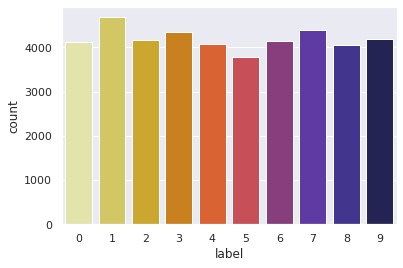

In [128]:
sns.set_theme(style="darkgrid")
sns.countplot(train["label"], palette="CMRmap_r")

In [129]:
y_train = train["label"]
x_train = train.drop(labels = ["label"], axis=1) 

##### Grayscale normalization dividing by 255 and reshaping to 28x28x1 scale

In [130]:
x_train_n = x_train / 255
test_n = test / 255

In [131]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)

In [132]:
y_train = to_categorical(y_train, num_classes = 10)

In [133]:
x_train, x_dev, y_train, y_dev = train_test_split(x_train, y_train, test_size=0.1, random_state=11)

##### Data Visualization

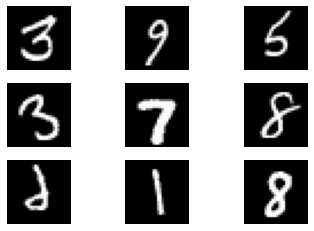

In [134]:
for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(x_train[i][:, :, 0], cmap=plt.get_cmap('gray'))
    plt.axis("off")

##### Building the Neural Network

In [135]:
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (3, 3), padding="same",
                 activation = "relu", input_shape = (28, 28, 1)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding="same",
                 activation = "relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(10, activation = "softmax"))

In [136]:
optimizer = Adam(learning_rate=0.001)

In [137]:
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [138]:
epochs = 10
batch_size = 50

In [139]:
# Data augmentation
gen = ImageDataGenerator(rotation_range = 5, zoom_range = 0.1, width_shift_range = 0.1, shear_range = 0.3, height_shift_range = 0.1)
gen.fit(x_train)

In [140]:
%%time
history = model.fit_generator(gen.flow(x_train, y_train, batch_size = batch_size),
                              epochs = epochs, validation_data = (x_dev, y_dev),
                              steps_per_epoch = x_train.shape[0] // batch_size)

Epoch 1/10
756/756 [==============================] - 32s 42ms/step - loss: 2.1480 - accuracy: 0.6109 - val_loss: 0.2668 - val_accuracy: 0.9221
Epoch 2/10
756/756 [==============================] - 33s 44ms/step - loss: 0.4680 - accuracy: 0.8526 - val_loss: 0.1562 - val_accuracy: 0.9529
Epoch 3/10
756/756 [==============================] - 32s 42ms/step - loss: 0.3207 - accuracy: 0.8974 - val_loss: 0.1019 - val_accuracy: 0.9671
Epoch 4/10
756/756 [==============================] - 32s 42ms/step - loss: 0.2617 - accuracy: 0.9190 - val_loss: 0.0870 - val_accuracy: 0.9688
Epoch 5/10
756/756 [==============================] - 32s 42ms/step - loss: 0.2226 - accuracy: 0.9300 - val_loss: 0.0695 - val_accuracy: 0.9793
Epoch 6/10
756/756 [==============================] - 33s 44ms/step - loss: 0.1971 - accuracy: 0.9388 - val_loss: 0.0808 - val_accuracy: 0.9755
Epoch 7/10
756/756 [==============================] - 32s 42ms/step - loss: 0.1792 - accuracy: 0.9436 - val_loss: 0.0594 - val_accuracy:

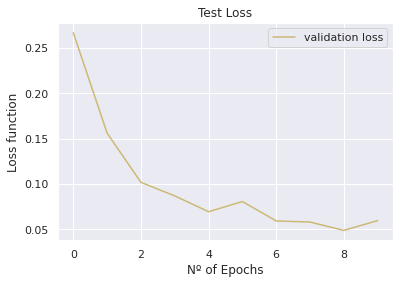

In [141]:
plt.plot(history.history["val_loss"], color="y", label="validation loss")
plt.title("Test Loss")
plt.xlabel("Nº of Epochs")
plt.ylabel("Loss function")
plt.legend()

132/132 [==============================] - 1s 8ms/step


Text(0.5, 1.0, 'Confusion Matrix')

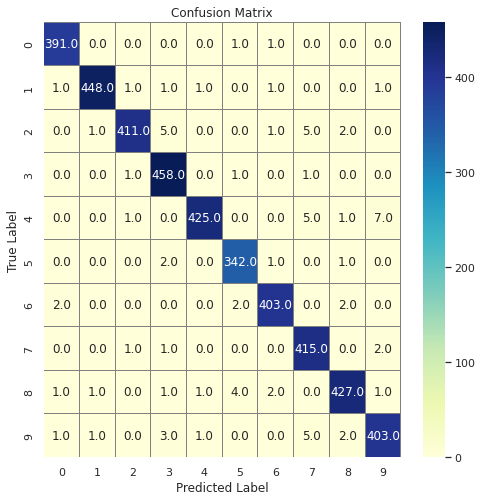

In [142]:
y_pred = model.predict(x_dev)
y_pred_classes = np.argmax(y_pred, axis = 1) 
y_true = np.argmax(y_dev, axis = 1) 
confusion_matrix = confusion_matrix(y_true, y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_matrix, annot=True, linewidths=0.01, cmap="YlGnBu", linecolor="gray", fmt= '.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

##### Prediction and Submission

In [143]:
predict_x = model.predict(test) 
classes_x = np.argmax(predict_x, axis=1)

875/875 [==============================] - 7s 8ms/step


In [147]:
submissions=pd.DataFrame({"ImageId": list(range(1, len(classes_x)+1)),
                         "Label": classes_x})
submissions.to_csv("predictions.csv", index=False, header=True)
files.download("predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [145]:
preds = pd.read_csv("predictions.csv")
preds.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
